# ANN Implementation

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input



In [2]:
# Load the dataset
file_path = 'Clustered_Customer_Data.csv'
data = pd.read_csv(file_path)

##  Step 1: Data Preprocessing

In [3]:
# Drop the Unnamed column and handle missing values by filling with the median
data = data.drop(columns=['Unnamed: 0'])
data.fillna(data.median(), inplace=True)

In [4]:
# Separate features and target variable
X = data.drop(columns=['Cluster'])
y = data['Cluster']

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
print(X_train.shape)
print(y_train.shape)

(40000, 17)
(40000,)


## Step 2: Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Step 3: Building the ANN Model

In [24]:
model = Sequential()

# Input layer (separate)
model.add(Input(shape=(17,)))

# First hidden layer
model.add(Dense(32, activation='relu'))

# Additional hidden layer
model.add(Dense(16, activation='relu'))

# Output layer with units equal to the number of unique clusters, using softmax
model.add(Dense(len(y.unique()), activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,155 (4.51 KB)

 Trainable params: 1,155 (4.51 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Step 4: Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Step 5: Training the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8264 - loss: 0.4043 - val_accuracy: 0.9877 - val_loss: 0.0374
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9876 - loss: 0.0361 - val_accuracy: 0.9891 - val_loss: 0.0260
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9918 - loss: 0.0234 - val_accuracy: 0.9894 - val_loss: 0.0225
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9937 - loss: 0.0184 - val_accuracy: 0.9956 - val_loss: 0.0148
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9967 - val_loss: 0.0118
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9951 - loss: 0.0136 - val_accuracy: 0.9973 - val_loss: 0.0106
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9961 - loss: 0.0114 - val_accuracy: 0.9971 - val_loss: 0.0095
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9965 - loss: 0.0095 - 

In [27]:
# Step 6: Evaluating the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 1.00


In [28]:
# Optional: Predict and display the results on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Directly use y_test as it is already in the correct format
y_test_classes = y_test


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Confusion Matrix:
[[1714    0    0]
 [   0 1363    6]
 [   3    3 6911]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00      1369
           2       1.00      1.00      1.00      6917

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



# Automating ANN Model Using Keras Tuner

In [32]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import initializers
import keras_tuner
from keras import *
from keras.layers import *
import tensorflow
from tensorflow import keras

### Building ANN Architecture

In [33]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(17,)))

    # Weight initializer choices
    initializer = hp.Choice("initializer", values=['he_normal', 'glorot_normal', 'random_normal'])

    # First hidden layer
    num_units1 = hp.Choice("num_units_1", values=[50, 100, 150, 200])
    activation1 = hp.Choice("activation_1", values=["relu", "tanh", "sigmoid"])
    model.add(Dense(num_units1, activation=activation1,
                    kernel_initializer=getattr(initializers, initializer)(seed=42)))

    # Second hidden layer
    num_units2 = hp.Choice("num_units_2", values=[50, 100, 150, 200])
    activation2 = hp.Choice("activation_2", values=["relu", "tanh", "sigmoid"])
    model.add(Dense(num_units2, activation=activation2,
                    kernel_initializer=getattr(initializers, initializer)(seed=42)))

    # Output layer: Len of Unique neuron for Multiclass binary classification
    model.add(Dense(len(y.unique()), activation='sigmoid',
                    kernel_initializer=getattr(initializers, initializer)(seed=42)))

    # Optimizer choices
    opt = hp.Choice("optimizer", values=['adam', 'rmsprop', 'sgd'])

    # Compiling the model
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

    return model


### Max Trial
4 choices for num_units_1

3 choices for activation_1

4 choices for num_units_2

3 choices for activation_2

3 choices for initializer

3 choices for optimizer

Then the total possible combinations are:

4×3×4×3×3×3=432

###  Setting up the tuner

In [34]:
tuner = keras_tuner.RandomSearch(
    build_model,                      # The model-building function with automated hyperparameters
    objective='val_loss',              # Objective to minimize (validation loss)
    max_trials=432,                     # Maximum number of trials to run
    directory="Tahseen",               # Directory to save tuning results
    project_name="ANN Market Segmentation"  # Name of the project
)

### Running the tuner

In [37]:

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 432 Complete [00h 00m 47s]
val_loss: 0.005716746672987938

Best val_loss So Far: 0.0019498508190736175
Total elapsed time: 04h 46m 57s


### Retrieving the best hyperparameters

In [38]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0].values

### Output the best hyperparameter values

In [39]:
best_hyperparameters

{'initializer': 'he_normal',
 'num_units_1': 200,
 'activation_1': 'relu',
 'num_units_2': 50,
 'activation_2': 'sigmoid',
 'optimizer': 'adam'}

In [44]:
# Get the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Best Model - Validation Loss: {loss:.4f}")
print(f"Best Model - Accuracy: {accuracy:.4f}")

# Print best hyperparameters again for clarity
print("Best Hyperparameters:")
for key, value in best_hyperparameters.items():
    print(f"{key}: {value}")

Best Model - Validation Loss: 0.0019
Best Model - Accuracy: 0.9999
Best Hyperparameters:
initializer: he_normal
num_units_1: 200
activation_1: relu
num_units_2: 50
activation_2: sigmoid
optimizer: adam


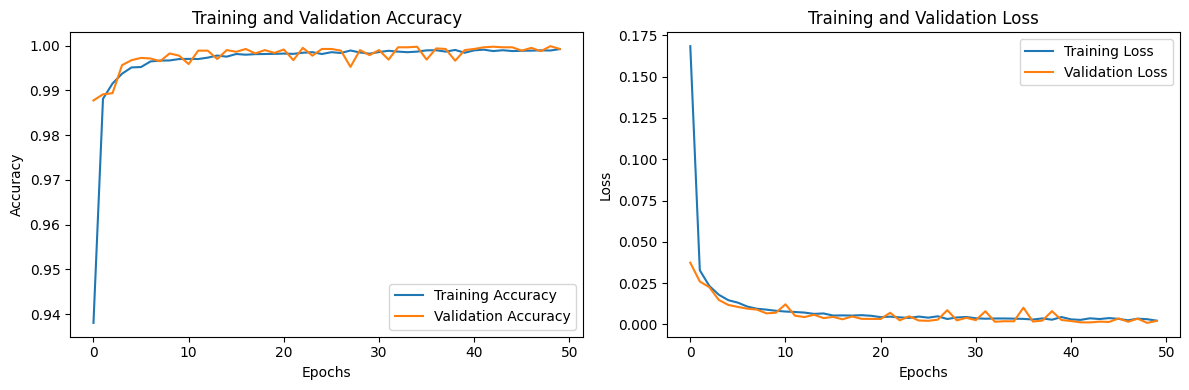

In [45]:
# Assuming 'history' is the result of model.fit()
plt.figure(figsize=(12, 4)) # Adjust figure size as needed

plt.subplot(1, 2, 1)  # Subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)  # Subplot for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()